# Day 09. Exercise 03
# Ensembles

## 0. Imports

In [90]:
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay


## 1. Preprocessing

1. Create the same dataframe as in the previous exercise.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test` and then get `X_train`, `y_train`, `X_valid`, `y_valid` from the previous `X_train`, `y_train`. Use the additional parameter `stratify`.

In [73]:
df = pd.read_csv('../data/day-of-week-not-scaled.csv')
df['dayofweek'] = np.random.choice(np.arange(7), size=1686, replace=True)
df

,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,dayofweek
0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
1,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
2,3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
3,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5
1682,6,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5
1683,7,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1684,8,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6


In [74]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)


In [75]:
XX = X_train.copy()
yy = y_train.copy()

In [76]:
X_train, X_valid, y_train, y_valid = train_test_split(XX, yy, test_size=0.2, random_state=21, stratify=yy)

## 2. Individual classifiers

1. Train SVM, decision tree and random forest again with the best parameters that you got from the 01 exercise with `random_state=21` for all of them.
2. Evaluate `accuracy`, `precision`, and `recall` for them on the validation set.
3. The result of each cell of the section should look like this:

```
accuracy is 0.87778
precision is 0.88162
recall is 0.87778
```

Лучшие параметры: {'C': 1, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
Лучшая точность: 0.16470053696819495


In [77]:
svc = SVC(random_state=21, C=1, kernel = 'rbf', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)

print(f'Accuracy is {accuracy_score(y_valid, y_pred):.5f}')
print(f'Precision is {precision_score(y_valid, y_pred, average='weighted'):.5f}')
print(f"recall is {recall_score(y_valid, y_pred, average='weighted'):.5f}")


Accuracy is 0.16296
Precision is 0.11192
recall is 0.16296


/home/tanya/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
model_tree = DecisionTreeClassifier(max_depth=14, class_weight='balanced', criterion='gini')
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_valid)
print(f'Accuracy is {accuracy_score(y_valid, y_pred):.5f}')
print(f'Precision is {precision_score(y_valid, y_pred, average='weighted'):.5f}')
print(f"recall is {recall_score(y_valid, y_pred, average='weighted'):.5f}")


Accuracy is 0.12963
Precision is 0.09414
recall is 0.12963


In [79]:
model_forest = RandomForestClassifier(max_depth=6, n_estimators=5, class_weight='balanced', criterion='gini')
model_forest.fit(X_train, y_train)
y_pred = model_forest.predict(X_valid)

print(f'Accuracy is {accuracy_score(y_valid, y_pred):.5f}')
print(f'Precision is {precision_score(y_valid, y_pred, average='weighted'):.5f}')
print(f"recall is {recall_score(y_valid, y_pred, average='weighted'):.5f}")

Accuracy is 0.15926
Precision is 0.16801
recall is 0.15926


## 3. Voting classifiers

1. Using `VotingClassifier` and the three models that you have just trained, calculate the `accuracy`, `precision`, and `recall` on the validation set.
2. Play with the other parameteres.
3. Calculate the `accuracy`, `precision` and `recall` on the test set for the model with the best weights in terms of accuracy (if there are several of them with equal values, choose the one with the higher precision).

Voting Classifier — это метод ансамблевого обучения, который комбинирует предсказания нескольких моделей для улучшения общей производительности. Вместо того, чтобы полагаться на один отдельный классификатор, мы объединяем результаты нескольких классификаторов и делаем итоговое предсказание на основе их голосов.

In [80]:
voting_clf = VotingClassifier(estimators=[
    ('svc', svc),    
    ('tree', model_tree), 
    ('forest', model_forest)  
], voting='soft')  # Используем мягкое голосование

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_valid)

print(f'Voting Accuracy: {accuracy_score(y_valid, y_pred_voting):.5f}')
print(f'Voting Precision: {precision_score(y_valid, y_pred_voting, average="weighted"):.5f}')
print(f'Voting Recall: {recall_score(y_valid, y_pred_voting, average="weighted"):.5f}')


Voting Accuracy: 0.15556
Voting Precision: 0.15509
Voting Recall: 0.15556


## 4. Bagging classifiers

1. Using `BaggingClassifier` and `SVM` with the best parameters create an ensemble, try different values of the `n_estimators`, use `random_state=21`.
2. Play with the other parameters.
3. Calculate the `accuracy`, `precision`, and `recall` for the model with the best parameters (in terms of accuracy) on the test set (if there are several of them with equal values, choose the one with the higher precision)

**Bagging (Bootstrap Aggregating)** — это метод ансамблевого обучения, который используется для улучшения точности модели. Основная идея bagging заключается в том, чтобы обучить несколько экземпляров одного и того же классификатора (или регрессора) на различных подмножествах исходных данных, а затем объединить их результаты.

**Как работает Bagging?**
- *Создание нескольких подмножеств данных:* Из исходного набора данных случайным образом извлекаются несколько подмножеств (каждое подмножество формируется с помощью метода bootstrap — случайного отбора с возвращением). Это значит, что одни и те же данные могут быть выбраны несколько раз, а другие — не быть выбраны вовсе. Таким образом, каждый классификатор обучается на уникальной выборке данных, но все классификаторы работают с примерно одинаковым объемом данных.

- *Обучение нескольких классификаторов:* Каждый классификатор обучается на своем подмножестве данных. Это может быть тот же классификатор, что и у нас был до этого, например, SVM или решающее дерево. Главное, что обучается не одна модель, а несколько.

- *Комбинирование результатов:* После того как все классификаторы обучены, их предсказания комбинируются для получения итогового результата:

Для классификации обычно используется голосование (например, hard voting или soft voting).
Для регрессии обычно усредняются предсказания.

In [81]:
svc = SVC(random_state=21, C=1, kernel='rbf', gamma='auto')
bagging_svc = BaggingClassifier(estimator=svc, n_estimators=10, random_state=21)
bagging_svc.fit(X_train, y_train)
y_pred_bagging_svc = bagging_svc.predict(X_valid)

print(f'Bagging SVM Accuracy: {accuracy_score(y_valid, y_pred_bagging_svc):.5f}')
print(f'Bagging SVM Precision: {precision_score(y_valid, y_pred_bagging_svc, average="weighted"):.5f}')
print(f'Bagging SVM Recall: {recall_score(y_valid, y_pred_bagging_svc, average="weighted"):.5f}')

Bagging SVM Accuracy: 0.12593
Bagging SVM Precision: 0.13168
Bagging SVM Recall: 0.12593


## 5. Stacking classifiers

1. To achieve reproducibility in this case you will have to create an object of cross-validation generator: `StratifiedKFold(n_splits=n, shuffle=True, random_state=21)`, where `n` you will try to optimize (the details are below).
2. Using `StackingClassifier` and the three models that you have recently trained, calculate the `accuracy`, `precision` and `recall` on the validation set, try different values of `n_splits` `[2, 3, 4, 5, 6, 7]` in the cross-validation generator and parameter `passthrough` in the classifier itself,
3. Calculate the `accuracy`, `precision`, and `recall` for the model with the best parameters (in terms of accuracy) on the test set (if there are several of them with equal values, choose the one with the higher precision). Use `final_estimator=LogisticRegression(solver='liblinear')`.

Стекинг (Stacking) — это метод ансамблевого обучения, который объединяет результаты нескольких моделей (базовых классификаторов) с помощью мета-модели. В отличие от методов, таких как Bagging и Voting, которые комбинируют предсказания одинаковым образом, Stacking учится объединять предсказания, используя другую модель (мета-модель), чтобы улучшить производительность.

**Как работает Stacking?**

*1. Базовые модели (base models):*

Несколько моделей обучаются на исходных данных (например, SVM, Decision Tree, Random Forest).
Эти модели могут быть как одинаковыми, так и разными.
Их цель — сделать предсказания для всех данных.

*2. Мета-модель:*

После того как базовые модели сделали свои предсказания, эти предсказания используются как входные данные для мета-модели (например, логистической регрессии или другой модели).
Мета-модель обучается на этих предсказаниях, чтобы лучше комбинировать их и улучшить итоговую точность.

*3. Кросс-валидация для создания надежных данных:*

Чтобы избежать утечки данных, предсказания базовых моделей создаются с использованием кросс-валидации (например, с StratifiedKFold)

In [87]:
# Создаем объект StratifiedKFold для кросс-валидации
n_splits_list = [2, 3, 4, 5, 6, 7]
best_accuracy = 0
best_model = None
best_n_splits = 0
best_passthrough = False #Параметр passthrough в StackingClassifier определяет, будет ли мета-модель (финальный классификатор) использовать исходные признаки вместе с предсказаниями базовых моделей.

for n_splits in n_splits_list:
    for passthrough in [True, False]:
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=21)
        
        # Определяем стекинг-классификатор
        stacking_clf = StackingClassifier(
            estimators=[
                ('svc', svc),
                ('tree', model_tree),
                ('forest', model_forest)
            ],
            final_estimator=LogisticRegression(solver='liblinear', random_state=21),
            cv=cv,
            passthrough=passthrough
        )
        
        # Обучаем классификатор
        stacking_clf.fit(X_train, y_train)
        
        # Оцениваем на валидационной выборке
        y_pred_stacking = stacking_clf.predict(X_valid)
        
        accuracy = accuracy_score(y_valid, y_pred_stacking)
        precision = precision_score(y_valid, y_pred_stacking, average='weighted')
        recall = recall_score(y_valid, y_pred_stacking, average='weighted')
        
        print(f'n_splits={n_splits}, passthrough={passthrough}')
        print(f'Accuracy: {accuracy:.5f}, Precision: {precision:.5f}, Recall: {recall:.5f}')
        
        # Сохраняем лучшую модель
        if accuracy > best_accuracy or (accuracy == best_accuracy and precision > best_precision):
            best_accuracy = accuracy
            best_precision = precision
            best_model = stacking_clf
            best_n_splits = n_splits
            best_passthrough = passthrough

print(f'Лучший результат: Accuracy={best_accuracy:.5f}, n_splits={best_n_splits}, passthrough={best_passthrough}')


n_splits=2, passthrough=True
Accuracy: 0.13704, Precision: 0.13441, Recall: 0.13704
n_splits=2, passthrough=False
Accuracy: 0.14815, Precision: 0.14983, Recall: 0.14815
n_splits=3, passthrough=True
Accuracy: 0.11481, Precision: 0.10814, Recall: 0.11481
n_splits=3, passthrough=False
Accuracy: 0.10000, Precision: 0.08910, Recall: 0.10000
n_splits=4, passthrough=True
Accuracy: 0.12593, Precision: 0.12200, Recall: 0.12593
n_splits=4, passthrough=False
Accuracy: 0.10370, Precision: 0.12043, Recall: 0.10370
n_splits=5, passthrough=True
Accuracy: 0.12593, Precision: 0.12451, Recall: 0.12593
n_splits=5, passthrough=False
Accuracy: 0.11481, Precision: 0.11082, Recall: 0.11481
n_splits=6, passthrough=True
Accuracy: 0.11111, Precision: 0.11074, Recall: 0.11111
n_splits=6, passthrough=False
Accuracy: 0.13704, Precision: 0.12564, Recall: 0.13704
n_splits=7, passthrough=True
Accuracy: 0.11111, Precision: 0.10841, Recall: 0.11111
n_splits=7, passthrough=False
Accuracy: 0.08519, Precision: 0.08549, Re

## 6. Predictions

1. Choose the best model in terms of accuracy (if there are several of them with equal values, choose the one with the higher precision).
2. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your full dataset), for which labname and for which users.
3. Save the model.

In [91]:
y_pred_meta = best_model.predict(X)

joblib.dump(best_model, 'best_meta_model.pkl')

['best_meta_model.pkl']

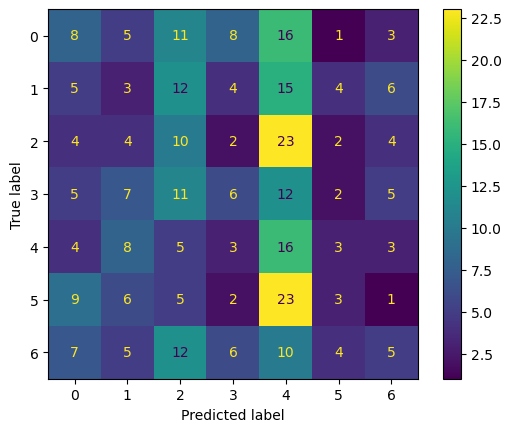

In [92]:
ConfusionMatrixDisplay.from_estimator(model_forest, X_test, y_test)